# Cluster Analysis in R

Cluster analysis is a powerful toolkit in the data science workbench. It is used to find groups of observations (clusters) that share similar characteristics. These similarities can inform all kinds of business decisions; for example, in marketing, it is used to identify distinct groups of customers for which advertisements can be tailored. In this course, you will learn about two commonly used clustering methods - hierarchical clustering and k-means clustering. You won't just learn how to use these methods, you'll build a strong intuition for how they work and how to interpret their results. You'll develop this intuition by exploring three different datasets: soccer player positions, wholesale customer spending data, and longitudinal occupational wage data.

## Calculating distance between observations


Cluster analysis seeks to find groups of observations that are similar to one another, but the identified groups are different from each other. This similarity/difference is captured by the metric called distance. In this chapter, you will learn how to calculate the distance between observations for both continuous and categorical features. You will also develop an intuition for how the scales of your features can affect distance.

### Calculate & plot the distance between two players
You've obtained the coordinates relative to the center of the field for two players in a soccer match and would like to calculate the distance between them.

In this exercise you will plot the positions of the 2 players and manually calculate the distance between them by using the Euclidean distance formula.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

[1] 11.6619

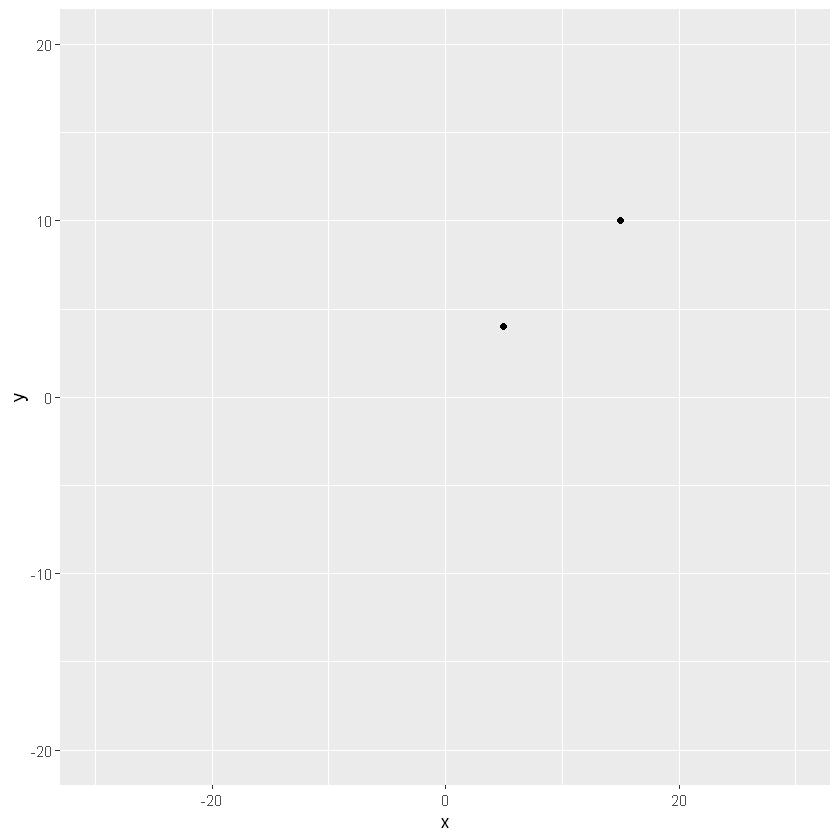

In [5]:
library(ggplot2)
# two players
x = c(5,15)
y = c(4,10)
two_players <- data.frame(x,y)

# Plot the positions of the players
ggplot(two_players, aes(x = x, y = y)) + 
  geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))

# Split the players data frame into two observations
player1 <- two_players[1, ]
player2 <- two_players[2, ]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$x - player2$x)^2 + (player1$y - player2$y)^2 )
player_distance

### Using the dist() function
Using the Euclidean formula manually may be practical for 2 observations but can get more complicated rather quickly when measuring the distance between many observations.

The dist() function simplifies this process by calculating distances between our observations (rows) using their features (columns). In this case the observations are the player positions and the dimensions are their x and y coordinates.

Note: The default distance calculation for the dist() function is Euclidean distance

In [6]:
# two players
x1 = c(5,15, 0)
y1 = c(4,10, 20)
three_players <- data.frame(x1,y1)

# Calculate the Distance Between two_players
dist_two_players <- dist(two_players)
dist_two_players

# Calculate the Distance Between three_players
dist_three_players <- dist(three_players)
dist_three_players

        1
2 11.6619

         1        2
2 11.66190         
3 16.76305 18.02776

### Effects of scale
You have learned that when a variable is on a larger scale than other variables in your data it may disproportionately influence the resulting distance calculated between your observations. Lets see this in action by observing a sample of data from the trees data set.

You will leverage the scale() function which by default centers & scales our column features.

Our variables are the following:

Girth - tree diameter in inches

Height - tree height in inches

In [17]:
trees <- read.csv('trees.csv')

three_trees <- trees[1:3, 1:2]

# Calculate distance for three_trees 
dist_trees <- dist(three_trees)

# Scale three trees & calculate the distance  
scaled_three_trees <- scale(three_trees)
dist_scaled_trees <- dist(scaled_three_trees)

# Output the results of both Matrices
print('Without Scaling')
print(dist_trees)

print('With Scaling')
print(dist_scaled_trees)

[1] "Without Scaling"
            1           2
2 0.009985568            
3 0.019971034 0.009985470
[1] "With Scaling"
         1        2
2 1.407281         
3 2.828404 1.421157


### Calculating distance between categorical variables
In this exercise you will explore how to calculate binary (Jaccard) distances. In order to calculate distances we will first have to dummify our categories using the dummy.data.frame() from the library dummies

You will use a small collection of survey observations stored in the data frame job_survey with the following columns:

job_satisfaction Possible options: "Hi", "Mid", "Low"

is_happy Possible options: "Yes", "No"

In [20]:
job_satisfaction = c("Low", "Low", "Hi", "Low", "Mid", "Hi")
is_happy = c("No", "No", "Yes", "Yes", "No", "No")

job_survey = data.frame(job_satisfaction, is_happy)

install.packages("dummies")
library(dummies)

# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method = "binary")

# Print the Original Data
print(job_survey)

# Print the Distance Matrix
print(dist_survey)

package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\RtmpWCA41B\downloaded_packages


dummies-1.5.6 provided by Decision Patterns

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

  job_satisfaction is_happy
1              Low       No
2              Low       No
3               Hi      Yes
4              Low      Yes
5              Mid       No
6               Hi       No
          1         2         3         4         5
2 0.0000000                                        
3 1.0000000 1.0000000                              
4 0.6666667 0.6666667 0.6666667                    
5 0.6666667 0.6666667 1.0000000 1.0000000          
6 0.6666667 0.6666667 0.6666667 1.0000000 0.6666667
